# Ames Housing Predictions

Competition and Data Source: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict for this challenge.


* MSSubClass: The building class (categorical with numeric label, i.e 20= 1-STORY 1946 & NEWER ALL STYLES
* MSZoning: Identifies the general zoning classification of the sale. categorical (i.e. A=Agriculutre, C=Commercial)
* LotFrontage: Linear feet of street connected to property Numeric
* LotArea: Lot size in square feet Numeric
* Street: Type of road access to property (categorical, i.e. Grvl=Gravel, Pave=Paved)
* Alley: Type of alley access to property
* LotShape: General shape of property (categorical, ie. reg=Regular
* LandContour: Flatness of the property (categorical, ie Lvl = near flat/level)
* Utilities: Type of utilities available ((categorical, i.e. AllPub = all public utilities
* LotConfig: Lot configuration (categorical, i.e. inside = inside lot
* Neighborhood: Physical locations within Ames city limits (categorical,i.e. Blmgtn = Bloomington heights
* Condition1: Proximity to main road or railroad (i.e. Norm = Normal)
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling categorical i.e. 1FAM  Single-family Detached
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality, Categorical numeric label from 1-10 (very poor - very excellent)
* OverallCond: Overall condition rating  Categorical numeric label from 1-10 (very poor - very excellent)
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
* RoofStyle: Type of roof (i.e. Flat = Flat)
* RoofMatl: Roof material (i.e. ClyTile Clay or Tile
* Exterior1st: Exterior covering on house (AsbShng Asbestos Shingles
* Exterior2nd: Exterior covering on house (if more than one material) (AsbShng Asbestos Shingles
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality (Ex Excellent... Po Poor)
* ExterCond: Present condition of the material on the exterior  (Ex Excellent... Po Poor)
* Foundation: Type of foundation (BrkTil Brick & Tile
* BsmtQual: Height of the basement  (Ex Excellent... Po Poor)
* BsmtCond: General condition of the basement  (Ex Excellent... Po Poor)
* BsmtExposure: Walkout or garden level basement walls (Gd Good Exposure
* BsmtFinType1: Quality of basement finished area (GLQ Good Living Quarters
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present) (GLQ Good Living Quarters
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating (Floor Floor Furnace
* HeatingQC: Heating quality and condition  (Ex Excellent... Po Poor)
* CentralAir: Central air conditioning (N/Y
* Electrical: Electrical system (SBrkr Standard Circuit Breakers & Romex
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality ( (Ex Excellent... Po Poor)
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating (Typ Typical Functionality
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality  (Ex Excellent... Po Poor)
* GarageType: Garage location (2Types More than one type of garage
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage (Fin Finished
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality  (Ex Excellent... Po Poor)
* GarageCond: Garage condition  (Ex Excellent... Po Poor)
* PavedDrive: Paved driveway (Y Paved
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality  (Ex Excellent... Po Poor)
* Fence: Fence quality  (Ex Excellent... Po Poor)
* MiscFeature: Miscellaneous feature not covered in other categories ( Elev Elevator, Gar2 2nd Garage (if not described in garage section)
* MiscVal: Dollar Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale ( WD Warranty Deed - Conventional

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score

#from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import recall_score , accuracy_score, precision_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.linear_model import Lasso, Ridge, LinearRegression

from sklearn.preprocessing import (
    StandardScaler, LabelBinarizer, Imputer, FunctionTransformer,PolynomialFeatures, OrdinalEncoder
)

from sklearn.feature_selection import (
    VarianceThreshold, SelectKBest, SelectPercentile, 
    SelectFromModel, f_regression, RFECV
)

from sklearn.impute import SimpleImputer
from sklearn_pandas import DataFrameMapper, CategoricalImputer
from sklearn.model_selection import GridSearchCV

from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.pipeline import Pipeline

import pandas as pd
import seaborn as sns
import altair as alt
alt.renderers.enable('notebook') # show and interact ith plots in jupyter notebook

%matplotlib inline

In [2]:
class CustomOrdinalEncoder(BaseEstimator, TransformerMixin):
    '''ordinal encoder
    initialize by passing in the possible values IN ORDER
    CustomEncoder(['S', 'M', 'L'])
    CustomEncoder(['Abysmal', 'Po', 'Go','Ex'])
    '''

    def __init__(self, categories):
        self.categories = categories
        return None

    def fit(self, X, **fit_params):
        assert np.alltrue([x in self.categories for x in np.unique(X)]), 'Item Mismatch'
        self.categories_ = {v: k+1 for k, v in enumerate(self.categories)}
        return self

    def transform(self, X):
        s = np.array([self.categories_[x] for x in np.array(X)])
        return s

In [4]:
class HouseTransformer(TransformerMixin):

    def transform(self, X, **transform_params):
        X['GarageYrBlt'] = X['GarageYrBlt'].fillna(X['YearBuilt'] )
        #TODO  calculate % of total basementSF is finished        
        return X

    def fit(self, X, y=None, **fit_params):
        return self

In [5]:
run_full = True
do_logtransform_price=True
chosen_model="LinearRegression"

In [6]:
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Data Clean up

In [7]:
df.shape

(1460, 81)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [9]:
df.describe().T
# columsn with particular skew
# Lot Area,BsmtFin SF 1, BsmtFin SF 2 -- basically all measurements

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [10]:
# what columns have nulls and how many?
for col in df.columns:
    if df[col].isna().sum() > 0:
        print(col, df[col].isnull().sum())


LotFrontage 259
Alley 1369
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


### EDA

In [11]:
def make_pair_plot(df_corr):
    # Set the default matplotlib figure size to 7x7:
    fix, ax = plt.subplots(figsize=(18,15))

    # Generate a mask for the upper triangle (taken from seaborn example gallery)
    mask = np.zeros_like(df_corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with seaborn.
    # Assign the matplotlib axis the function returns. This will let us resize the labels.
    ax = sns.heatmap(df_corr, mask=mask, ax=ax, annot=True, cmap="BrBG")

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    plt.show()

Do a prelimary check on correlation with numeric features

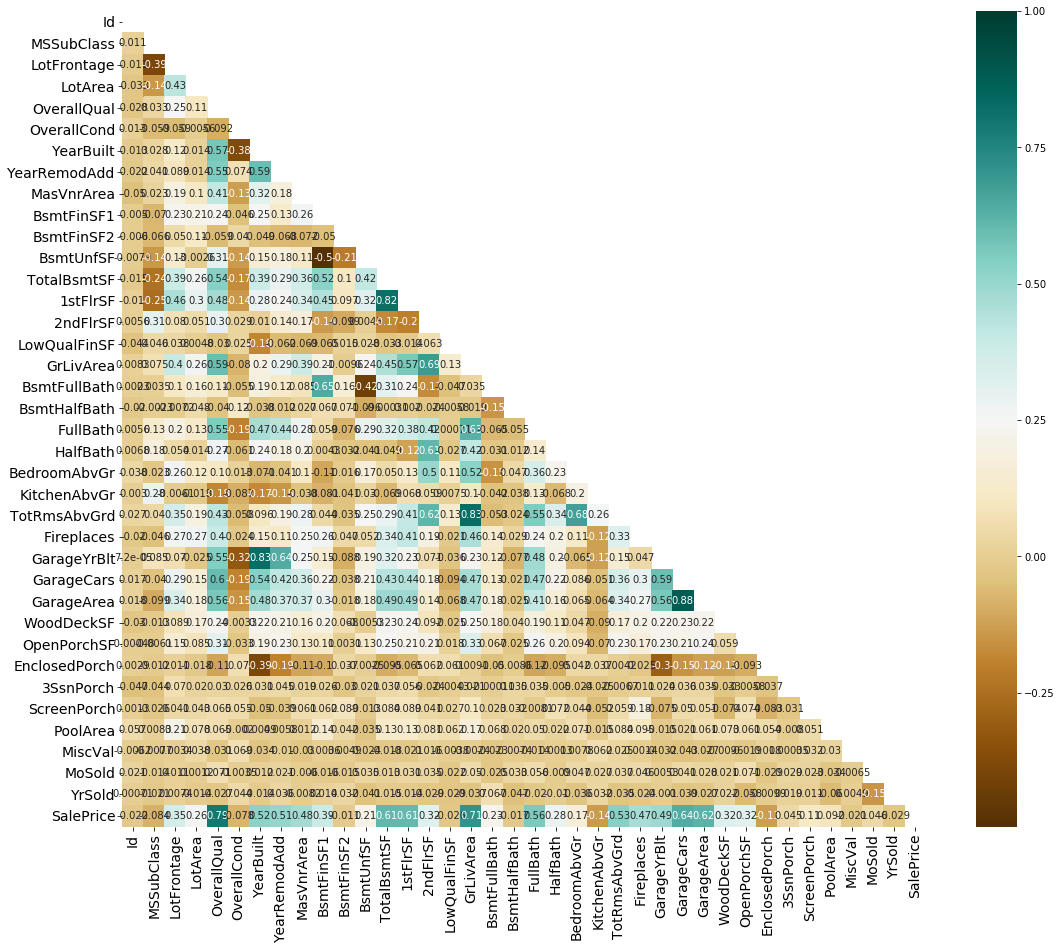

In [10]:
make_pair_plot(df.corr())

* This is a busy plot, but we can see right away a high correlation between Overall Quality and SalePrice
* Gr Live Area also important
* let's print out the most important
    

In [9]:
corr = df.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice.head(15))

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64


#### Impact of Quality and Gr Liv Area on Sale Price
* Gr Liv Area scatter plot show a couple of clear outliers where large houses sold for comparatively cheap
* if I replot against log transformed sale price, it does look a bit more linear

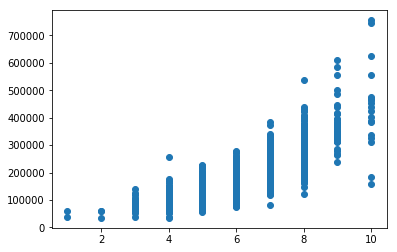

In [12]:
plt.scatter(df['OverallQual'], df['SalePrice'])

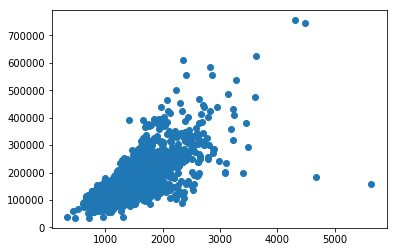

In [13]:
plt.scatter(df['GrLivArea'], df['SalePrice'])
# we have a couple obvious outliers here with very large living area and a cheap price

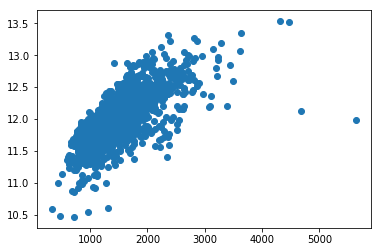

In [14]:
# replot against log transformed sale price -- a bit more linear
plt.scatter(df['GrLivArea'], np.log1p(df['SalePrice']))

Text(0,0.5,'Frequency')

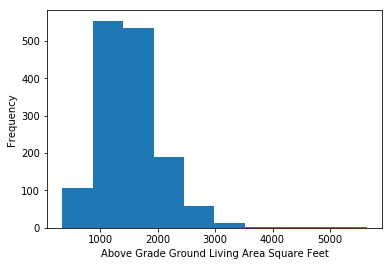

In [15]:
plt.hist(df['GrLivArea'])
plt.xlabel("Above Grade Ground Living Area Square Feet")
plt.ylabel("Frequency")

In [16]:
df['GrLivArea'][(df['GrLivArea']>=5000)]

1298    5642
Name: GrLivArea, dtype: int64

In [17]:
# any rows missing these two key pieces of info?
df['OverallQual'].isnull().sum(), df['GrLivArea'].isnull().sum()


(0, 0)

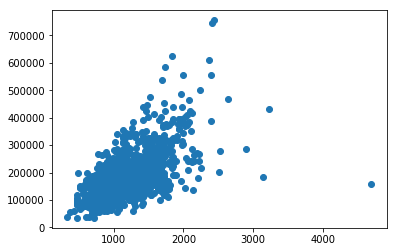

In [18]:
plt.scatter(df['1stFlrSF'], df['SalePrice'])

#### Impact of Year Built on SalePrice
* can see a lot more expensive houses built in recent years
* could be an interesting interaction here...

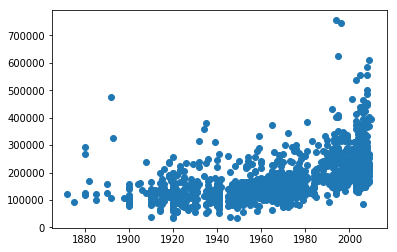

In [19]:
#plt.scatter(df['Year Built'][(df['Year Built']>=2000)], df['SalePrice'][(df['Year Built']>=2000)])
plt.scatter(df['YearBuilt'], df['SalePrice'])

#### Scatterplot of SalePrice
* clearly right skewed

Text(0,0.5,'Frequency')

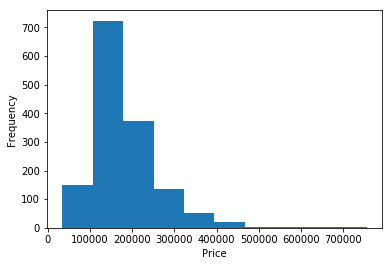

In [20]:
plt.hist(df['SalePrice'])
plt.xlabel("Price")
plt.ylabel("Frequency")
# price is right skewed

#### Impact of Month Sold on SalePrice

Text(0,0.5,'Frequency')

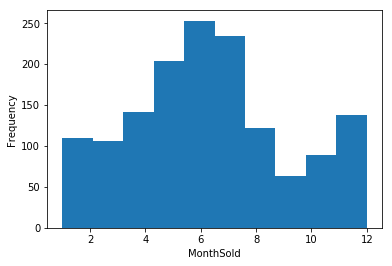

In [21]:
plt.hist(df['MoSold'])
plt.xlabel("MonthSold")
plt.ylabel("Frequency")
# price is right skewed

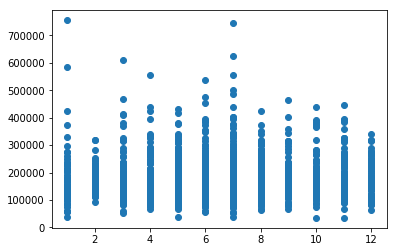

In [22]:
plt.scatter(df['MoSold'], df['SalePrice'])
# bit of a drop off in Dec

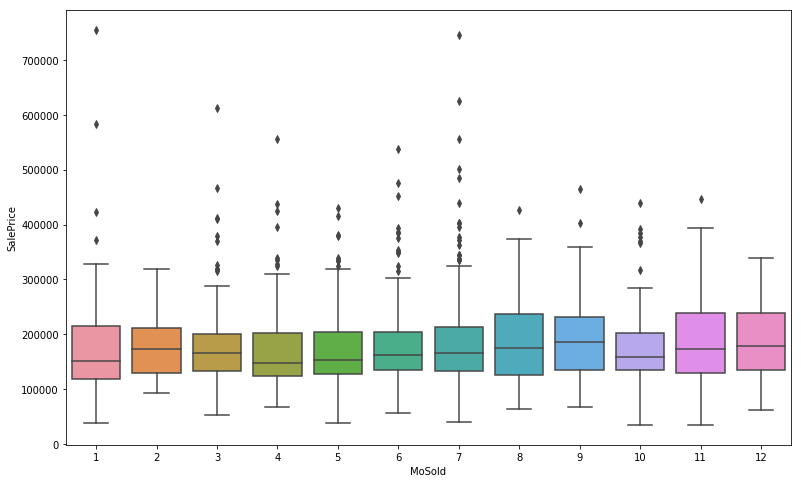

In [23]:
# boxplot
month_df = df[['MoSold','SalePrice']]#.groupby('MoSold').mean()
month_df=month_df.reset_index()
plt.figure(figsize=(13, 8))
sns.boxplot(x="MoSold", y="SalePrice", data=month_df)



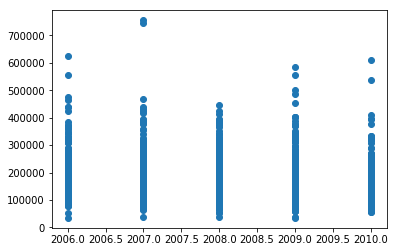

In [24]:
plt.scatter(df['YrSold'], df['SalePrice'])

## Baseline Model
Since Overall Quality is so highly correlated with house price, let's build a simple model that uses it to predict price

In [10]:
df_simple=df[['OverallQual']]
y_simple= df[['SalePrice']]
lr =LinearRegression()
lr.fit(df_simple,y_simple)
lr.score(df_simple,y_simple)

0.6256518924621182

Our simple model using only Overall Quality to predict price has an accuracy of .64.  that is the benchmark we need to beat 

## Data Cleanup

* there are a few things we need to do/define before we do our main transforms in the dataframe mapper
* drop the two outliers in the dataset that sold for really cheap
 * Columns to drop:
    * can drop ID and PID colmsn
    * drop Pool QC column as 2042 of 2051 rows are missing
    * alley and Misc Feature are also missing many values 
    * drop Utilities because almost all houses have the same value therefore little predictive power
* Note: data is cleaned up in the DataFramemapping function except for a few things that we need to take care of separately in the pre_fix_df function

In [12]:
# drop the two outliers in the dataset that sold for really cheap
ix=df['GrLivArea'][(df['GrLivArea']>=5000)].index
df.drop(index = ix, axis=0, inplace=True)

## Do our train test split

* create a DataFramemapper to transform the passed in dataframe
* do Inputation where needed and scale as appropriate

In [13]:
df.shape

(1459, 81)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:-1], df['SalePrice'], random_state=2003)
X_train.shape, X_test.shape, y_train.shape

((1094, 80), (365, 80), (1094,))

In [15]:
# what if we try log transform of price to address right skew?
if do_logtransform_price:
    y_train = np.log1p(y_train)
    y_test = np.log1p(y_test)

In [16]:
# drop the following columns by not including in mapper
#'Id','PID','Alley','Pool QC','Utilities'
mapper = DataFrameMapper([
    ('MSSubClass',[CategoricalImputer(), LabelBinarizer()]),
    #MS Zoning: Identifies the general zoning classification of the sale.
    ('MSZoning', [CategoricalImputer(), LabelBinarizer()]),
    (['LotFrontage'],[SimpleImputer(strategy='median'), StandardScaler()]),
    (['LotArea'],[SimpleImputer(strategy='median'), StandardScaler()]),
    ('LotShape', LabelBinarizer()),
    ('LandContour', LabelBinarizer()),
    ('LotConfig', LabelBinarizer()),
    ('LandSlope', LabelBinarizer()),
    ('Condition1', LabelBinarizer()),
    ('Condition2', LabelBinarizer()),
    ('BldgType', LabelBinarizer()),
    ('HouseStyle', LabelBinarizer()),
    (['OverallQual'], [SimpleImputer(strategy='median'), StandardScaler()]),
    (['OverallCond'],[SimpleImputer(strategy='median'), StandardScaler()]),
    (['YearBuilt'], [StandardScaler()]),
    (['YearRemodAdd'],[ StandardScaler()]),
    ('Neighborhood', [CategoricalImputer(), LabelBinarizer()]),
    ('RoofStyle', [CategoricalImputer(), LabelBinarizer()]),
    ('RoofMatl',[CategoricalImputer(), LabelBinarizer()]),
    ('Exterior1st',[CategoricalImputer(), LabelBinarizer()]),
    ('Exterior2nd',[CategoricalImputer(), LabelBinarizer()]),
    ('MasVnrType',[CategoricalImputer(replacement='None'), LabelBinarizer()]),
    # for masonry veneer, all houses with None for veneer in the dataset have 0 for the veneer area, so we'll do the same here
    (['MasVnrArea'], [SimpleImputer(fill_value=0), StandardScaler()]),
    # Ranked (Ordinal) column
    ('ExterQual',  [CategoricalImputer(replacement='TA'), 
                      CustomOrdinalEncoder(['NA', 'Po','Fa','TA', 'Gd','Ex'])]),
    ('ExterCond', [CategoricalImputer(replacement='TA'), CustomOrdinalEncoder(['NA', 'Po','Fa','TA', 'Gd','Ex']) ]),
    
    ('Foundation', [CategoricalImputer(), LabelBinarizer()]),
    
    # converted to rank BsmtCond; count missing values as not having a basement
    ('BsmtCond', [CategoricalImputer(replacement='NA'), CustomOrdinalEncoder(['NA', 'Po','Fa','TA', 'Gd','Ex']) ]),

    # converted to rank
    ('BsmtQual', [CategoricalImputer(replacement='NA'), CustomOrdinalEncoder(['NA', 'Po','Fa','TA', 'Gd','Ex']) ]),
    
    # Basement exposure - Ordinal
    ('BsmtExposure', [CategoricalImputer(replacement='NA'), CustomOrdinalEncoder(['NA', 'No','Mn','Av', 'Gd']) ]),
    
     # basement finishes Ordinal; probably better to use label binarizer
    ('BsmtFinType1', [CategoricalImputer(replacement='NA'), LabelBinarizer()]), #, CustomOrdinalEncoder(['NA', 'Unf','LwQ','Rec', 'BLQ','ALQ', 'GLQ']) ]),
    ('BsmtFinType2', [CategoricalImputer(replacement='NA'), LabelBinarizer()]), #, CustomOrdinalEncoder(['NA', 'Unf','LwQ','Rec', 'BLQ','ALQ', 'GLQ']) ]),
   
    # Finished Basement Square Footage
    (['BsmtFinSF1'], [SimpleImputer(fill_value=0), StandardScaler()]),
    (['BsmtFinSF2'], [SimpleImputer(fill_value=0), StandardScaler()]),
    #unfinished Basement square footage
    (['BsmtUnfSF'], [SimpleImputer(fill_value=0), StandardScaler()]),
    # TODO calculate % of total basementSF is finished
   #(['PctFinishedBsmt'], [SimpleImputer(fill_value=0), StandardScaler()]),
   
    # total basement square footage
    (['TotalBsmtSF'], [SimpleImputer(fill_value=0), StandardScaler()]),
    
     ('Heating', [CategoricalImputer(), LabelBinarizer()]),
    # Heating Quality -Ordinal; default to Typical 
    ('HeatingQC', [CategoricalImputer(replacement='TA'), CustomOrdinalEncoder(['NA', 'Po','Fa','TA', 'Gd','Ex']) ]),
    (['CentralAir'],  [OrdinalEncoder()]), # Central Air is a Y/N column
    ('Electrical',[CategoricalImputer(replacement='None'), LabelBinarizer()]),
    
    (['1stFlrSF'], [SimpleImputer(strategy='median'), StandardScaler()]),
    (['2ndFlrSF'], [SimpleImputer(strategy='median'), StandardScaler()]),
    (['LowQualFinSF'], [SimpleImputer(fill_value=0), StandardScaler()]),
    (['GrLivArea'], [SimpleImputer(strategy='median'), StandardScaler()]),
    # remove scaling on number of baths/beds
    (['BsmtFullBath'], [SimpleImputer(fill_value=0)]),
    (['BsmtHalfBath'], [SimpleImputer(fill_value=0)]),
    (['FullBath'], [SimpleImputer(strategy='most_frequent')]),
    (['HalfBath'], [SimpleImputer(fill_value=0)]),
    (['BedroomAbvGr'], [SimpleImputer(strategy='most_frequent')]),
    (['KitchenAbvGr'], [SimpleImputer(strategy='most_frequent')]),
    
    # kitchen quality - ordinal - default to typical 
    ('KitchenQual', [CategoricalImputer(replacement='TA'), CustomOrdinalEncoder(['NA', 'Po','Fa','TA', 'Gd','Ex']) ]),
    
    (['TotRmsAbvGrd'], [SimpleImputer(strategy='most_frequent'), StandardScaler()]),
    
     # home functionality rating
    ('Functional', [CategoricalImputer(replacement='Typ'), CustomOrdinalEncoder(['Sal', 'Sev','Maj2','Maj1', 'Mod','Min2', 'Min1','Typ']) ]),
    
    (['Fireplaces'], [SimpleImputer(fill_value=0), StandardScaler()]),
    # Fireplace quality - Ordinal - default to no fireplace if missing
     ('FireplaceQu', [CategoricalImputer(replacement='NA'), CustomOrdinalEncoder(['NA', 'Po','Fa','TA', 'Gd','Ex']) ]),
    
    ('GarageType',[CategoricalImputer(replacement='None'), LabelBinarizer()]),
    
    #  df['GarageYrBlt'].fillna(df['YearBuilt'], inplace=True)
    (['GarageYrBlt'],  [StandardScaler()]), 
    
    # believe it is safer to binarizer finish rather than convert to orddinal since we don't know how much better a finished
    # garage is
    ('GarageFinish', [CategoricalImputer(replacement='None'), LabelBinarizer()]), 
    (['GarageCars'],[SimpleImputer(strategy='median'), StandardScaler()]),
    (['GarageArea'], [SimpleImputer(strategy='median'), StandardScaler()]),
    # Garage Quality - ordinal
    ('GarageQual', [CategoricalImputer(replacement='NA'), CustomOrdinalEncoder(['NA', 'Po','Fa','TA', 'Gd','Ex']) ]),
    ('GarageCond', [CategoricalImputer(replacement='NA'), CustomOrdinalEncoder(['NA', 'Po','Fa','TA', 'Gd','Ex']) ]),

    (['PavedDrive'],  [OrdinalEncoder()]), # y/n value
    (['WoodDeckSF'], [SimpleImputer(fill_value=0), StandardScaler()]),
    (['OpenPorchSF'], [SimpleImputer(fill_value=0), StandardScaler()]),
    (['EnclosedPorch'], [SimpleImputer(fill_value=0), StandardScaler()]),
    (['3SsnPorch'], [SimpleImputer(fill_value=0), StandardScaler()]),
    (['PoolArea'], [SimpleImputer(fill_value=0), StandardScaler()]),
   # ('PoolQC', [CategoricalImputer(replacement='NA'), CustomOrdinalEncoder(['NA', 'Po','Fa','TA', 'Gd','Ex']) ]),
    ('Fence', [CategoricalImputer(replacement='None'), LabelBinarizer()]),
    ('MiscFeature', [CategoricalImputer(replacement='None'), LabelBinarizer()]),
    (['MiscVal'], [SimpleImputer(fill_value=0), StandardScaler()]),
    (['MoSold'], [CategoricalImputer(), LabelBinarizer()]), # month isn't really a ranking -- probably better to bin it
    (['YrSold'], [StandardScaler()]),
    ('SaleType', [CategoricalImputer(), LabelBinarizer()])
], df_out=True)

In [17]:
pipe_1 = Pipeline([
    ('map', mapper),
    ('feature_gen', HouseTransformer()),
])

In [18]:
pipe_1 = pipe_1.fit(X_train)
X_train = pipe_1.transform(X_train)
X_train.sample(5)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted

,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,...,MoSold_12,YrSold,SaleType_COD,SaleType_CWD,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
1078,0,0,0,0,0,0,0,0,0,0,...,0,-1.354746,0,0,0,0,0,0,0,1
585,1,0,0,0,0,0,0,0,0,0,...,0,-1.354746,0,0,0,0,0,1,0,0
289,0,0,0,0,0,0,1,0,0,0,...,0,-0.603559,0,0,0,0,0,0,0,1
281,1,0,0,0,0,0,0,0,0,0,...,0,-1.354746,0,0,0,0,0,1,0,0
917,1,0,0,0,0,0,0,0,0,0,...,0,0.898815,0,0,0,0,0,0,0,1


Apply same mapper to our test data

In [19]:

X_test.head()
X_test = pipe_1.transform(X_test)
X_test.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,...,MoSold_12,YrSold,SaleType_COD,SaleType_CWD,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
139,0,0,0,0,0,1,0,0,0,0,...,0,0.898815,0,0,0,0,0,0,0,1
1214,0,0,0,0,0,0,0,0,0,1,...,0,-1.354746,0,0,0,0,0,0,0,1
1010,0,0,0,0,1,0,0,0,0,0,...,0,0.147628,0,0,0,0,0,0,0,1
1287,1,0,0,0,0,0,0,0,0,0,...,0,-1.354746,0,0,0,0,0,0,0,1
370,0,0,0,0,0,1,0,0,0,0,...,0,-1.354746,0,0,0,0,0,0,0,1


In [20]:
# double check for nulls
for col in X_train.columns:
    if X_train[col].isnull().sum() >0:
        print(col)

In [21]:
X_train.columns

Index(['MSSubClass_20', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45',
       'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75',
       'MSSubClass_80', 'MSSubClass_85',
       ...
       'MoSold_12', 'YrSold', 'SaleType_COD', 'SaleType_CWD', 'SaleType_ConLD',
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD'],
      dtype='object', length=246)

## Feature Engineering

* There likely certain features that play a much bigger role in the pricing of a house (overall quality, square footage, neighborhood etc) than others (fence quality etc).  Let's try playing with some polynomial feature engineering on the features with the highest correlation with price
* but first let's spot check the impact of some of hte categorical variables on price

In [22]:

filter_col = [col for col in X_train if col.startswith('Neighborhood')]
X_train[filter_col].corrwith(y_train).sort_values(ascending=False)

Neighborhood_NridgHt    0.359017
Neighborhood_NoRidge    0.277395
Neighborhood_StoneBr    0.199557
Neighborhood_Somerst    0.154393
Neighborhood_CollgCr    0.129099
Neighborhood_Timber     0.124408
Neighborhood_Gilbert    0.081644
Neighborhood_ClearCr    0.074562
Neighborhood_Veenker    0.068406
Neighborhood_Crawfor    0.065269
Neighborhood_NWAmes     0.055761
Neighborhood_Blmngtn    0.034172
Neighborhood_SawyerW    0.014872
Neighborhood_Blueste   -0.022092
Neighborhood_NPkVill   -0.026582
Neighborhood_SWISU     -0.038116
Neighborhood_Mitchel   -0.049262
Neighborhood_BrDale    -0.107817
Neighborhood_Sawyer    -0.136559
Neighborhood_MeadowV   -0.152601
Neighborhood_BrkSide   -0.153543
Neighborhood_NAmes     -0.174689
Neighborhood_Edwards   -0.203681
Neighborhood_OldTown   -0.235339
Neighborhood_IDOTRR    -0.251898
dtype: float64

In [23]:

filter_col = [col for col in X_train if col.startswith('MS SubClass')]
X_train[filter_col].corrwith(y_train).sort_values(ascending=False)

Series([], dtype: float64)

In [24]:

filter_col = [col for col in X_train if col.startswith('MS Zoning')]
X_train[filter_col].corrwith(y_train).sort_values(ascending=False)

Series([], dtype: float64)

In [25]:
def add_polynomialfeatures(df):
    poly = PolynomialFeatures(include_bias=False, degree=2)
    features = ['OverallQual', 'GrLivArea', 'TotalBsmtSF','GarageArea','1stFlrSF','YearBuilt','FullBath']
    X_poly = poly.fit_transform(df[features])
    poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names(features))
    # drop the original columns so we can concatenate this with our original dataframe
    poly_df.drop(columns=features, axis=1, inplace=True)
    newcols = poly_df.columns
    #print(list(newcols))
    #df[list(newcols)] = poly_df[newcols].values
    for col in newcols:
        df[col] = poly_df[col].values
    return df

In [26]:
X_train=add_polynomialfeatures(X_train)
X_test=add_polynomialfeatures(X_test)

In [27]:
X_train.columns

Index(['MSSubClass_20', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45',
       'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75',
       'MSSubClass_80', 'MSSubClass_85',
       ...
       'GarageArea^2', 'GarageArea 1stFlrSF', 'GarageArea YearBuilt',
       'GarageArea FullBath', '1stFlrSF^2', '1stFlrSF YearBuilt',
       '1stFlrSF FullBath', 'YearBuilt^2', 'YearBuilt FullBath', 'FullBath^2'],
      dtype='object', length=274)

## Feature Selection

In [28]:
X_train.shape

(1094, 274)

Test 1 : variance threshold

In [29]:
if run_full:
    threshold = VarianceThreshold(.05)
    X_threshold = threshold.fit_transform(X_train)
    X_threshold.shape


In [30]:
if run_full:
    # score it for comparison
    included = X_train.columns[threshold.get_support()]
    print(cross_val_score(LinearRegression(), X_train.loc[:,included], y_train, cv=5).mean())

0.8989535873720611


Test2 : select K best

In [31]:
#for k in [50,75,100,125,150,175,200,225, 250]:
for k in [50,70, 75, 80, 85, 90, 95,100,125,130, 150]:
    kbest = SelectKBest(score_func=f_regression, k=k)
    X_kbest = kbest.fit_transform(X_train, y_train)
    included = X_train.columns[kbest.get_support()]
    print(k, round(cross_val_score(LinearRegression(), X_train.loc[:,included], y_train, cv=5).mean(),5))
    #print(k,cross_val_score(LinearRegression(), X_train.loc[:,included], y_train, cv=5))


50 0.89175
70 0.8929
75 0.89411
80 0.89417
85 0.89776
90 0.89843
95 0.89632
100 0.89687
125 0.89548
130 0.90204
150 -2.1650026320839193e+20


Test 3: K Precentile

In [32]:
if run_full:
    percent = SelectPercentile(f_regression, 30)
    X_percent = percent.fit_transform(X_train, y_train)
    X_percent.shape
    

In [33]:
# score it for comparison
if run_full:
    included = X_train.columns[percent.get_support()]
    print(cross_val_score(LinearRegression(), X_train.loc[:,included], y_train, cv=5).mean())

0.8959529386502656


Test 4: select from Model

In [34]:
if run_full:
    select_lasso = SelectFromModel(Lasso(alpha=.001))
    X_sel_lasso = select_lasso.fit_transform(X_train, y_train)
    X_sel_lasso.shape
    

In [35]:
if run_full:
    # score it for comparison
    included = X_train.columns[select_lasso.get_support()]
    print(cross_val_score(LinearRegression(), X_train.loc[:,included], y_train, cv=5).mean())

0.9194350283573364


In [36]:
for alpha in [.001, .01, .1]:
    select_lasso = SelectFromModel(Lasso(alpha=alpha))
    X_sel_lasso = select_lasso.fit_transform(X_train, y_train)
    included = X_train.columns[select_lasso.get_support()]
    print(alpha, round(cross_val_score(LinearRegression(), X_train.loc[:,included], y_train, cv=5).mean(),5))
    #print(alpha, round(cross_val_score(KNeighborsRegressor(n_neighbors=8, metric='manhattan',weights='distance'), X_train.loc[:,included], y_train, cv=5).mean(),5))
   # print(alpha, cross_val_score(KNeighborsRegressor(n_neighbors=8, metric='manhattan',weights='distance'), X_train.loc[:,included], y_train, cv=5))
    #print(alpha,cross_val_score(LinearRegression(), X_train.loc[:,included], y_train, cv=5))

0.001 0.91944
0.01 0.90215
0.1 0.75543


Test 5: RFECV

In [37]:
if run_full:
    rfe = RFECV(Lasso(alpha=.001), step=10,cv=5, min_features_to_select=50) #,verbose=2)
    X_rfe = rfe.fit_transform(X_train, y_train)
    X_rfe.shape


In [38]:
if run_full:
    # score it for comparison
    rfe_included = X_train.columns[rfe.get_support()]
    print(cross_val_score(LinearRegression(), X_train.loc[:,included], y_train, cv=5).mean())
    #print(rfe.get_support().shape)
    print(X_train.loc[:,rfe.get_support()].shape)

0.7554317006397523
(1094, 84)


#### Best Feature selection model
* depending on the changes made, generally either the KBest or Lasso models are producing the best results 

In [39]:
# kbest = SelectKBest(score_func=f_regression, k=100)
# X_kbest = kbest.fit_transform(X_train, y_train)
# X_kbest.shape
# selected_features=kbest.get_support()

In [40]:
# select_lasso = SelectFromModel(Lasso(alpha=.001))
# X_sel_lasso = select_lasso.fit_transform(X_train, y_train)
# selected_features=select_lasso.get_support()

In [41]:
# RFE
selected_features=rfe.get_support()

In [42]:
# preview selected columns
X_train.columns[selected_features][:10]

Index(['MSSubClass_70', 'MSSubClass_160', 'MSZoning_C (all)', 'MSZoning_RL',
       'MSZoning_RM', 'LotFrontage', 'LotArea', 'LotShape_IR2', 'LotShape_Reg',
       'LotConfig_CulDSac'],
      dtype='object')

#### Try GridSearch on KNN Regression to find best parameters

In [43]:
# knn_params = {
#     'n_neighbors':[8,9,10,11,12,13],
#     'weights':['uniform','distance'],
#     'metric':['euclidean','manhattan']
# }
# #5,10,15,20,25
# knn_gridsearch = GridSearchCV(KNeighborsRegressor(), knn_params, cv=5, verbose=1, n_jobs=2)

# knn_gridsearch = knn_gridsearch.fit(X_train.loc[:,included], y_train)

In [44]:
# knn_gridsearch.best_score_

In [45]:
# knn_gridsearch.best_params_

## Run Selected Model

In [46]:
print(chosen_model)
if chosen_model == "LinearRegression":
    model = LinearRegression()
    model.fit(X_train.loc[:,selected_features],y_train)
    print(model.score(X_test.loc[:,selected_features], y_test))
else:
    model=KNeighborsRegressor(n_neighbors=8, metric='manhattan',weights='distance')
    model.fit(X_train.loc[:,selected_features],y_train)
    print(model.score(X_test.loc[:,selected_features], y_test))

LinearRegression
0.8869407406549192


Let's examine our coefficients to get an idea of what's going on

In [47]:
if chosen_model == "LinearRegression":
    df_model_coef = pd.DataFrame(model.coef_, 
                 index = X_test.loc[:,selected_features].columns, 
                 columns=['weight'])

    # remember these are all scaled
    # but shows relative importance
    df_model_coef.sort_values(by='weight', ascending=False, inplace=True)
    print(df_model_coef.head(20))

                        weight
Neighborhood_StoneBr  0.124294
Neighborhood_Crawfor  0.122269
OverallQual           0.109148
GrLivArea             0.105875
Exterior1st_BrkFace   0.094869
TotalBsmtSF           0.084930
CentralAir            0.075092
Neighborhood_BrkSide  0.058643
OverallCond           0.051844
GarageQual            0.051466
Neighborhood_NridgHt  0.045980
SaleType_New          0.043932
MSSubClass_70         0.039115
LotShape_IR2          0.036947
Condition1_Norm       0.036528
LotConfig_CulDSac     0.034798
Functional            0.032902
BldgType_1Fam         0.032490
MasVnrType_Stone      0.031618
HalfBath              0.028549


### Evalulate our model

In [48]:
y_pred= model.predict(X_test.loc[:,selected_features])

In [49]:
# Mean Squared Error MSE
if do_logtransform_price:
    print(mean_squared_error(np.exp(y_test) -1, np.exp(y_pred) -1))
else:
    print(mean_squared_error(y_test, y_pred))


1263577378.0008514


In [50]:
# RMSE

if do_logtransform_price:
    print(np.sqrt(mean_squared_error(np.exp(y_test) -1, np.exp(y_pred) -1)))
else:
    print(np.sqrt(mean_squared_error(y_test, y_pred)))

35546.8335861417


* root mean squared error returns our error back to our original units of y (cost)
* so, if RMSE is 25740, that means our average mistake in house price is $25,740

Text(0,0.5,'preds')

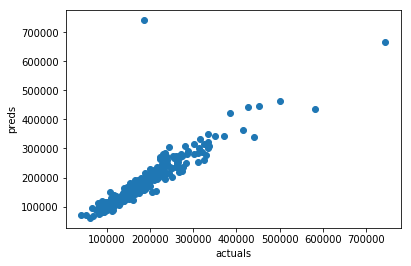

In [51]:

if do_logtransform_price:
    plt.scatter(np.exp(y_test) -1, np.exp(y_pred) -1)
else:
    plt.scatter(y_test, y_pred)
plt.xlabel("actuals")
plt.ylabel("preds")
# we are underpredicting at the high end

Text(0.5,1,'Residual plot')

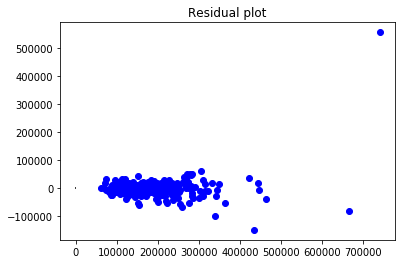

In [52]:
# residual plot
if do_logtransform_price:
    x_plot = plt.scatter(np.exp(y_pred) -1, ((np.exp(y_pred) -1) - (np.exp(y_test)-1)), c='b')
else:
    x_plot = plt.scatter(y_pred, (y_pred - y_test), c='b')
plt.hlines(y=0, xmin= -1000, xmax=1000)
plt.title('Residual plot')



In [53]:
import math
def rmsle(y, h):
    return np.sqrt(np.square(np.log(h + 1) - np.log(y + 1)).mean())

In [54]:
rmsle(y_test,y_pred)
# best so far: 0.009862186605782398

0.009895075052323697

* Residual plot has been showing some signs of “heteroscedasticity”, meaning that the residuals are larger for more expensive houses

# Generate our predictions

* read and transform the test.csv dataset following same steps applied to training file
* save the id column to a separate dataframe for outputing our predictions

In [57]:
df_final_validate = pd.read_csv("test.csv")
df_final_preds = df_final_validate[['Id']]
df_final_preds.head()

,Id
0,1461
1,1462
2,1463
3,1464
4,1465


In [58]:

# df_final_validate=pre_fix_df(df_final_validate)
# df_final_validate = mapper.transform(df_final_validate)
df_final_validate = pipe_1.transform(df_final_validate)
df_final_validate=add_polynomialfeatures(df_final_validate)
df_final_validate.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,...,GarageArea^2,GarageArea 1stFlrSF,GarageArea YearBuilt,GarageArea FullBath,1stFlrSF^2,1stFlrSF YearBuilt,1stFlrSF FullBath,YearBuilt^2,YearBuilt FullBath,FullBath^2
0,1,0,0,0,0,0,0,0,0,0,...,1.442359,-0.840219,-0.430902,1.200982,0.489454,0.251014,-0.699610,0.128731,-0.358791,1.0
1,1,0,0,0,0,0,0,0,0,0,...,0.625088,-0.369480,0.361499,-0.790625,0.218395,-0.213677,0.467327,0.209061,-0.457232,1.0
2,0,0,0,0,0,1,0,0,0,0,...,0.000375,-0.011874,0.015923,0.038718,0.376223,-0.504498,-1.226740,0.676509,1.645004,4.0
3,0,0,0,0,0,1,0,0,0,0,...,0.001430,0.023399,-0.032345,-0.075633,0.382864,-0.529235,-1.237520,0.731565,1.710631,4.0
4,0,0,0,0,0,0,0,0,0,0,...,0.017878,0.044829,0.088039,0.267419,0.112407,0.220754,0.670544,0.433535,1.316867,4.0


In [59]:
#df_final_validate.loc[:,kbest.get_support()].describe().T

In [60]:
final_validate_pred = model.predict(df_final_validate.loc[:,selected_features])
final_validate_pred[0:10]

array([11.69163425, 11.97912406, 12.11388676, 12.20161462, 12.15782348,
       12.05491529, 12.08817863, 12.00286348, 12.18337229, 11.6648107 ])

add our sale price predictions to the df_final_preds dataframe and then save it as a csv for export

In [61]:
if do_logtransform_price:
    df_final_preds['SalePrice'] = np.exp(pd.Series(final_validate_pred))-1
else:
    df_final_preds['SalePrice'] = pd.Series(final_validate_pred)
df_final_preds.to_csv("ag_preliminary.csv", index=False)

In [62]:
df_final_preds.head()

,Id,SalePrice
0,1461,119566.249027
1,1462,159391.352114
2,1463,182386.124500
3,1464,199109.378730
4,1465,190578.265622


## Actions Taken
* model that uses all features does better than our baseline simple model
* our simple baseline model used Overal Quality rating to predict house prices and acheived an R2 score of .64 (64% of the variability in pirces can be explained by that feature alone)
* next model used LinearRegression on basically all the features in the data set with no selection or engineering -- did ok
* next added feature selection to whittle down number of features (generally KBest was the best feature selection, although Lasso often worked well too.  Generally, it helped to remove about half the features)
* Next removed two outliers from the training dataframe (these were large houses that sold for relatively cheap)
* changed from treating ranked features (i.e. po, fair, good, excellent condition) to numeric rankings
* Became worried that most importand predictors (such as overall quality and square footage, both of which have a very high correlation with sale price were becoming lost in the noise of all the features.  So added Polynomial features on the top correlated features (tried 2nd and 3rd degree - 2nd had better results)
* noticed on residual plot that the model was consistently poor at predicting the higher priced houses.  It showed signs of heteroscedasticity, with bigger errors for higher house prices.  So tried adding a log transform on house price to counteract this -- it did help
* Tried KNeighborsRegression in case it was better able to handle the right-skew of sale price, but it performed somewhat worse
* returned to LinearREgression and played with removing some additional features



## Final Model

* finally settled on using model that used:
    * KBest to pick the top 125 columns 
    * LInear Regression
    * reduced basic features
    * polynomial features on top 10 numeric columns correlated with sale price
    * log transform of house price